In [8]:
import subprocess

In [ ]:
export_source = ["Probabilities", "Simple Segmentation", "Uncertainty", "Features", "Labels"]
output_format = ["bmp", "gif", "hdr", "jpeg", "jpg", "pbm", "pgm", "png", "pnm", "ppm", "ras",
                "tif", "tiff", "xv", "bmp sequence", "gif sequence", "hdr sequence", "jpeg sequence",
                "jpg sequence", "pbm sequence", "pgm sequence", "png sequence", "pnm sequence",
                "ppm sequence", "ras sequence", "tif sequence", "tiff sequence", "xv sequence",
                "multipage tiff", "multipage tiff sequence", "hdf5", "compressed hdf5", "numpy, dvid"]

In [21]:
# Chemin vers le script run_ilastik.sh
ilastik_script_path = "/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/run_ilastik.sh"
#image_path = "/Users/titouanlegourrierec/Desktop/results/File/Sheet12_leaf1.jpg"
image_path = "/Users/titouanlegourrierec/Desktop/new_results/File/Sheet_55_leaf5.jpg"
result_path = "/Users/titouanlegourrierec/Desktop/test/{nickname}_simple_Segmentation.png"

# Arguments pour exécuter ilastik en mode headless
ilastik_args = [
    ilastik_script_path,
    "--headless",
    "--project=/Users/titouanlegourrierec/Desktop/segment3.ilp",
    "--export_source=Simple Segmentation",
    "--output_format=png",
    "--output_filename_format=/Users/titouanlegourrierec/Desktop/test/{nickname}_simple_Segmentation.png",
    "/Users/titouanlegourrierec/Desktop/results/File/Sheet12_leaf1.jpg"
]

# Exécuter la commande ilastik en mode headless avec les arguments spécifiés
try:
    subprocess.run(ilastik_args, check=True)
    print("Conversion terminée avec succès !")
except subprocess.CalledProcessError as e:
    print("Erreur lors de la conversion :", e)

INFO ilastik.app: Using tiktorch executable: ['/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/bin/python', '-m', 'tiktorch.server']
INFO ilastik.app: config file location: <none>
INFO ilastik.app: Starting ilastik from "/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/lib/python3.7".
Starting ilastik from "/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/lib/python3.7".


WARNING 2024-03-26 18:03:53,950 opConservationTracking 17959 8600801856 Could not find any ILP solver
WARNING 2024-03-26 18:03:53,959 opStructuredTracking 17959 8600801856 Could not find any ILP solver
WARNING 2024-03-26 18:03:53,963 structuredTrackingWorkflow 17959 8600801856 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!


INFO ilastik.shell.projectManager: Opening Project: /Users/titouanlegourrierec/Desktop/segment3.ilp
INFO ilastik.workflows.pixelClassification.pixelClassificationWorkflow: Beginning Batch Processing
INFO ilastik.applets.dataSelection.dataSelectionApplet: Using axistags from previous lane: [y x c, None]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to /Users/titouanlegourrierec/Desktop/test/Sheet12_leaf1_simple_Segmentation.png
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 176.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 10.9GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (2039, 2040, 4)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 1.4GiB
DEBUG lazyflow.operators.classifierOperators: Features took 0.44869 seconds. Prediction took 0.048636 seconds. Subregion: start '[0, 2040, 0]' stop '[2039, 206

INFO ilastik.app: Using tiktorch executable: ['/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/bin/python', '-m', 'tiktorch.server']
INFO ilastik.app: config file location: <none>
INFO ilastik.app: Starting ilastik from "/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/lib/python3.7".
Starting ilastik from "/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/lib/python3.7".


WARNING 2024-03-26 18:05:46,312 opConservationTracking 18456 8604856896 Could not find any ILP solver
WARNING 2024-03-26 18:05:46,321 opStructuredTracking 18456 8604856896 Could not find any ILP solver
WARNING 2024-03-26 18:05:46,325 structuredTrackingWorkflow 18456 8604856896 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!


INFO ilastik.shell.projectManager: Opening Project: /Users/titouanlegourrierec/Desktop/segment3.ilp
INFO ilastik.workflows.pixelClassification.pixelClassificationWorkflow: Beginning Batch Processing
INFO ilastik.applets.dataSelection.dataSelectionApplet: Using axistags from previous lane: [y x c, None]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to /Users/titouanlegourrierec/Desktop/test/Sheet_53_leaf5_simple_Segmentation.png
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 176.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 10.9GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (2100, 1976, 4)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 1.4GiB
DEBUG lazyflow.operators.classifierOperators: Features took 2.042514 seconds. Prediction took 6.136095 seconds. Subregion: start '[0, 0, 0]' stop '[2100, 1976

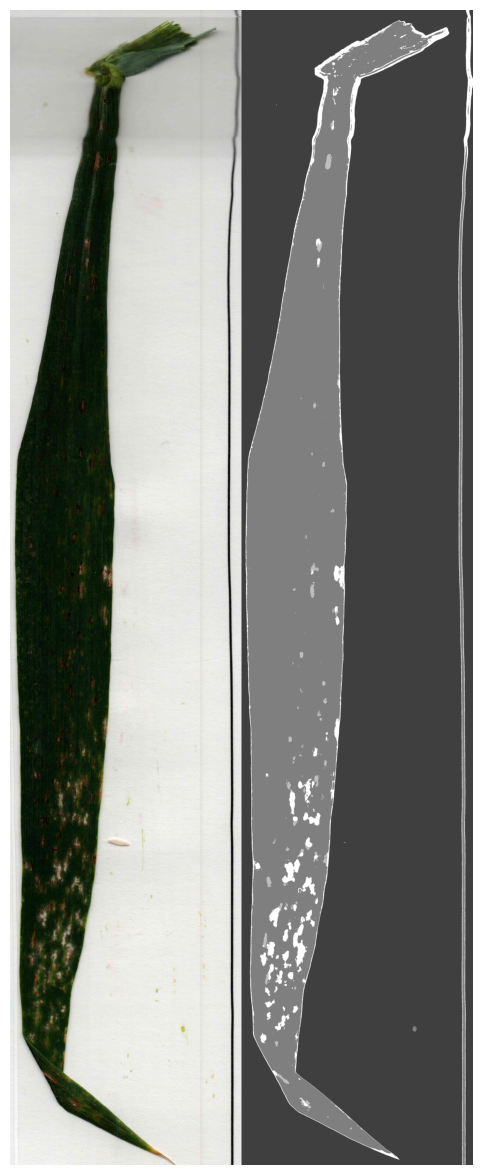

In [22]:
import cv2
import matplotlib.pyplot as plt
import subprocess
import os

# Chemin vers le script run_ilastik.sh
ilastik_script_path = "/Applications/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/run_ilastik.sh"
#image_path = "/Users/titouanlegourrierec/Desktop/results/File/Sheet13_leaf3.jpg"
image_path = "/Users/titouanlegourrierec/Desktop/new_results/File/Sheet_53_leaf5.jpg"
project_path = "/Users/titouanlegourrierec/Desktop/segment3.ilp"
#project_path = "/Users/titouanlegourrierec/Downloads/clc.ilp"
result_base_path = "/Users/titouanlegourrierec/Desktop/test/"

# Arguments pour exécuter Ilastik en mode headless
ilastik_args = [
    ilastik_script_path,
    "--headless",
    "--project=" + project_path,
    "--export_source=Simple Segmentation",
    "--output_format=png",
    "--output_filename_format=" + result_base_path + "{nickname}_simple_Segmentation.png",
    image_path
]

# Exécuter la commande Ilastik en mode headless avec les arguments spécifiés
try:
    subprocess.run(ilastik_args, check=True)
    print("Conversion terminée avec succès !")
except subprocess.CalledProcessError as e:
    print("Erreur lors de la conversion :", e)


# Récupérer le nom de fichier de l'image d'entrée
input_filename = os.path.basename(image_path)

# Créer le chemin d'accès complet pour le résultat
result_path = os.path.join(result_base_path, input_filename.replace(".jpg", "_simple_Segmentation.png"))

# Lecture des images avec OpenCV
img = cv2.imread(image_path)
result = cv2.imread(result_path)

# Concaténer les deux images horizontalement
concatenated_img = cv2.hconcat([img, result])

# Afficher l'image concaténée
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(concatenated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


